In [ ]:
# NAIVE BAYES: supervised classification algorithm. uses ayes theorem for classification.
# 3 types of naive bayes:
#     - gaussian naive bayes(assumption : dataset is normal distribution) - mostly used
#     - bernoulli - used for binary classification
#     - multi nomial

In [ ]:
# here we will discuss multinomial naive bayes

In [ ]:
#  multinomial naive bayes cares about the count of the features(1, 2, 3, etc) whereas the bernoulli naive bayes model cares about the presence of absense of the features(0 ro 1).

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # for gaussian naive bayes
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE # for oversampling
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer # converting text into matrix
from sklearn.naive_bayes import BernoulliNB # for bernoulli naive bayes
from sklearn.naive_bayes import MultinomialNB # for multinomial naive bayes

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
df.drop(['Unnamed: 0','label'], axis = 1, inplace=True)

In [9]:
df.duplicated().sum() # number of duplicate rows

0

In [8]:
df.drop_duplicates(inplace=True) # removes duplicate rows

we will use countvectorizer() from sklearn.feature_extraction.text to vectorize the text into array.

![vectorizer screenshot.png](<attachment:vectorizer screenshot.png>)
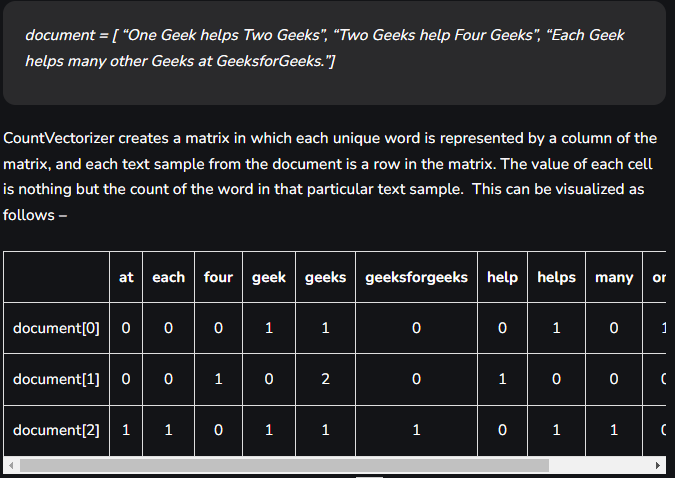

In [18]:
# count vectorizer
vec = CountVectorizer()
x = vec.fit_transform(df['text']).toarray() # you need to use 'toarray()' to convert the sklearn sparse array to numpy array
y = df['label_num']


In [20]:

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
# fitting the bernoulli model
bernoulli = BernoulliNB()
bernoulli.fit(x_train, y_train)

BernoulliNB()

In [23]:
y_pred = bernoulli.predict(x_test)

In [24]:
accuracy_score(y_test, y_pred)

0.8338338338338338

In [25]:
confusion_matrix(y_test, y_pred)

array([[666,  22],
       [144, 167]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       688
           1       0.88      0.54      0.67       311

    accuracy                           0.83       999
   macro avg       0.85      0.75      0.78       999
weighted avg       0.84      0.83      0.82       999



In [42]:
multinomial = MultinomialNB()
multinomial.fit(x_train, y_train)

MultinomialNB()

In [44]:
y_pred = multinomial.predict(x_test)

In [45]:
accuracy_score(y_test, y_pred)


0.980980980980981

In [46]:
confusion_matrix(y_test, y_pred)


array([[675,  13],
       [  6, 305]], dtype=int64)

In [47]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       688
           1       0.96      0.98      0.97       311

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999

